In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('listings.csv')

# Drop irrelevant columns
df = df.drop(['id', 'host_id', 'host_name', 'license'], axis=1)

# Handle missing values
df['last_review'].fillna('NA', inplace=True)
df['reviews_per_month'].fillna(0, inplace=True)

# Convert 'last_review' to datetime
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

df.head()

,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,Tiny home in Caye Caulker · ★4.82 · 1 bed · 1 ...,Belize,Belize Islands,17.748320,-88.024740,Entire home/apt,101.0,3,417,2023-12-16,2.56,3,231,38
1,Condo in Caye Caulker Village · ★4.86 · 2 bed...,Belize,Belize Islands,17.741660,-88.023950,Entire home/apt,555.0,1,57,2023-11-07,0.70,31,235,12
2,Home in Caye Caulker Village · ★4.54 · 1 bedr...,Belize,Belize Islands,17.736440,-88.028580,Entire home/apt,139.0,2,71,2023-10-18,0.74,31,296,14
3,Rental unit in Caye Caulker · ★4.31 · 1 bedroo...,Belize,Belize Islands,17.743174,-88.024269,Entire home/apt,139.0,1,112,2023-11-13,0.92,7,0,20
4,Bed and breakfast in San Pedro · ★4.92 · 1 bed...,Belize,Belize Islands,17.942940,-87.946460,Hotel room,403.0,2,83,2023-03-05,0.78,4,283,1


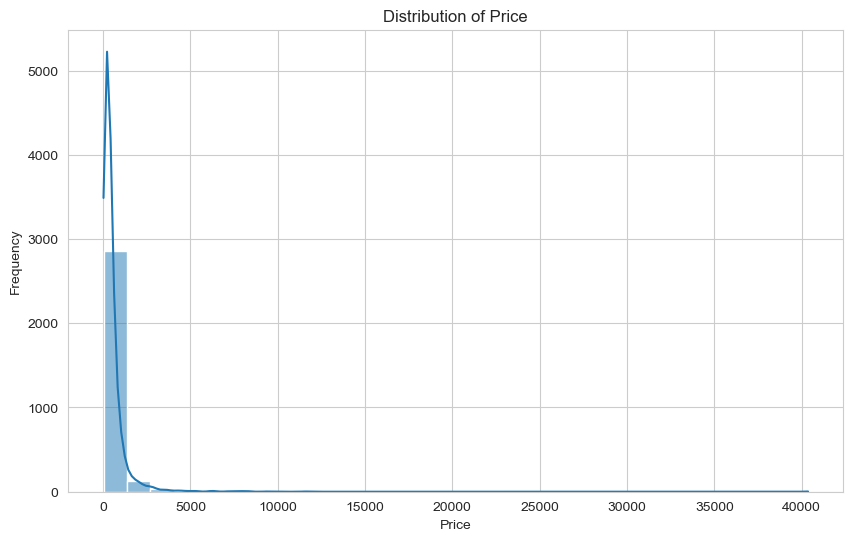

'\nInsight: The distribution of prices shows that most listings have prices below $100, \nwith a few outliers reaching higher values. This suggests that the majority of\nlistings are affordable for guests.\n\nRecommendation: Hosts should consider pricing their listings competitively within the \nlower to mid-range price brackets to appeal to a broader audience of potential guests.\n'

In [64]:
# Visualize the distribution of 'price'
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.savefig('price_distribution.png')
plt.show()

'''
Insight: The distribution of prices shows that most listings have prices below $100, 
with a few outliers reaching higher values. This suggests that the majority of
listings are affordable for guests.

Recommendation: Hosts should consider pricing their listings competitively within the 
lower to mid-range price brackets to appeal to a broader audience of potential guests.
''' 

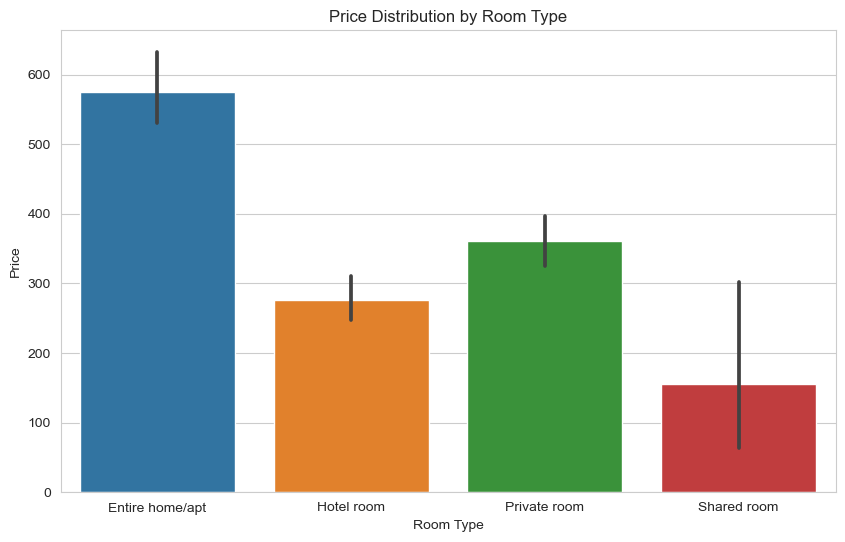

' \nInsight: Entire home/apartment listings tend to have higher prices compared to private \nrooms and shared rooms. This indicates that guests are willing to pay more for the privacy\nand amenities offered by entire properties.\n \n \nRecommendation: Hosts with entire home/apartment listings can capitalize on this trend by \nhighlighting the unique features and amenities of their properties to justify the higher prices.\n'

In [65]:
# Visualize the relationship between 'price' and 'room_type'
plt.figure(figsize=(10, 6))
sns.barplot(x='room_type', y='price', data=df)
plt.title('Price Distribution by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.savefig('price_by_room_type.png')
plt.show()

''' 
Insight: Entire home/apartment listings tend to have higher prices compared to private 
rooms and shared rooms. This indicates that guests are willing to pay more for the privacy
and amenities offered by entire properties.
 
 
Recommendation: Hosts with entire home/apartment listings can capitalize on this trend by 
highlighting the unique features and amenities of their properties to justify the higher prices.
''' 

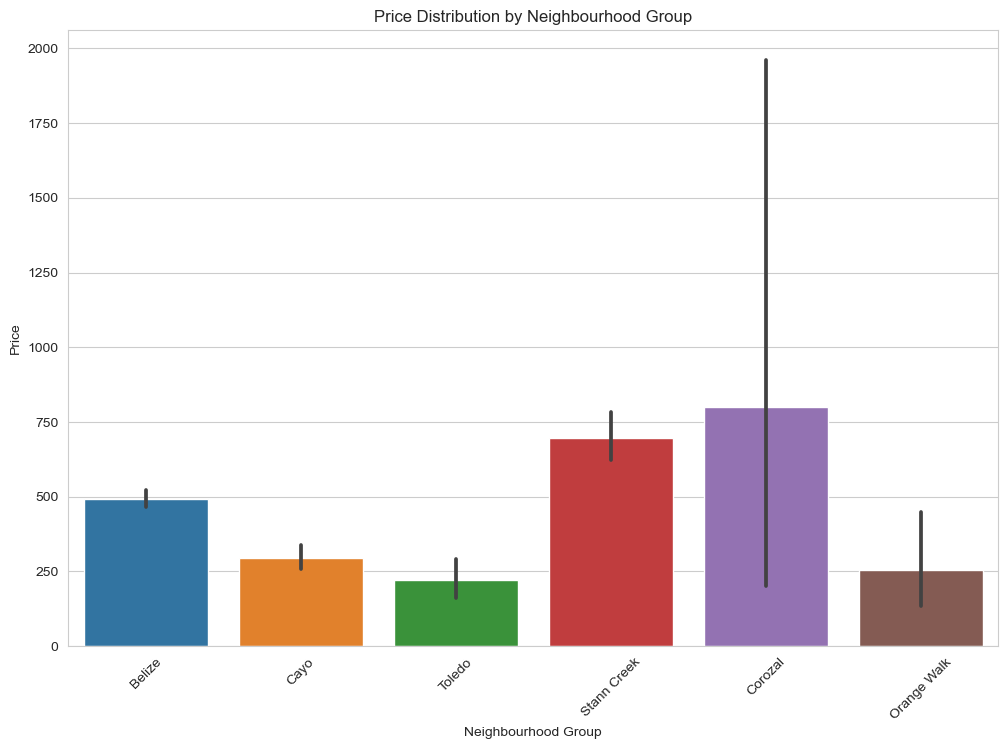

' \nInsight: Certain neighbourhood groups command higher prices for Airbnb listings compared \nto others. This suggests that factors such as location, amenities, and demand influence\npricing variations across different neighbourhoods.\n \n \nRecommendation: Hosts should consider the location and amenities of their properties when \nsetting prices, ensuring they remain competitive within their neighbourhood groups while \nreflecting the unique value proposition of their listings.\n'

In [66]:
# Visualize the relationship between 'price' and 'neighbourhood_group'
plt.figure(figsize=(12, 8))
sns.barplot(x='neighbourhood_group', y='price', data=df)
plt.title('Price Distribution by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.savefig('price_by_neighbourhood.png')
plt.show()

''' 
Insight: Certain neighbourhood groups command higher prices for Airbnb listings compared 
to others. This suggests that factors such as location, amenities, and demand influence
pricing variations across different neighbourhoods.
 
 
Recommendation: Hosts should consider the location and amenities of their properties when 
setting prices, ensuring they remain competitive within their neighbourhood groups while 
reflecting the unique value proposition of their listings.
''' 

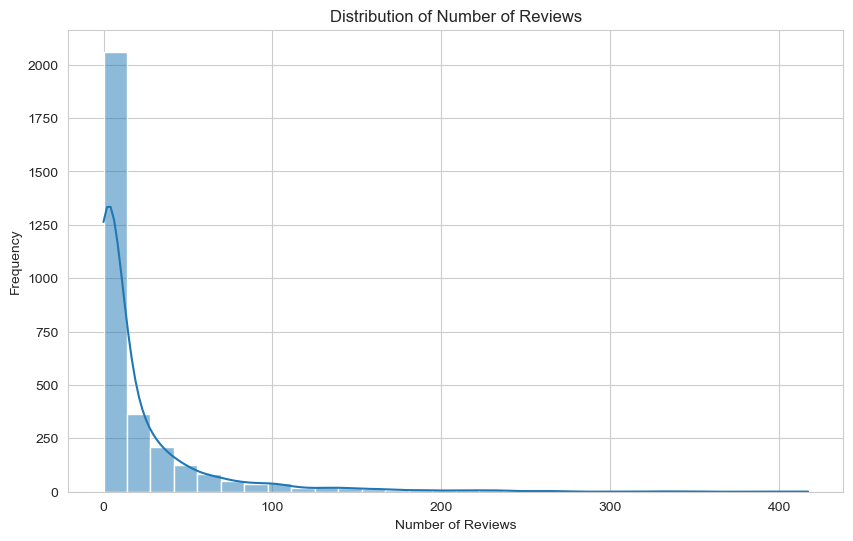

' \nInsight: The distribution of the number of reviews indicates that many listings have a relatively \nlow number of reviews, with a few listings receiving a high number of reviews. This suggests \nvariations in guest engagement and satisfaction levels across different listings.\n \n \nRecommendation: Hosts should actively encourage guests to leave reviews by providing exceptional \nhospitality and creating memorable experiences. Positive reviews can enhance the visibility and \ncredibility of their listings, leading to increased bookings.\n'

In [67]:
# Visualize the distribution of 'number_of_reviews'
plt.figure(figsize=(10, 6))
sns.histplot(df['number_of_reviews'], bins=30, kde=True)
plt.title('Distribution of Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.savefig('number_of_reviews_distribution.png')
plt.show()

''' 
Insight: The distribution of the number of reviews indicates that many listings have a relatively 
low number of reviews, with a few listings receiving a high number of reviews. This suggests 
variations in guest engagement and satisfaction levels across different listings.
 
 
Recommendation: Hosts should actively encourage guests to leave reviews by providing exceptional 
hospitality and creating memorable experiences. Positive reviews can enhance the visibility and 
credibility of their listings, leading to increased bookings.
''' 

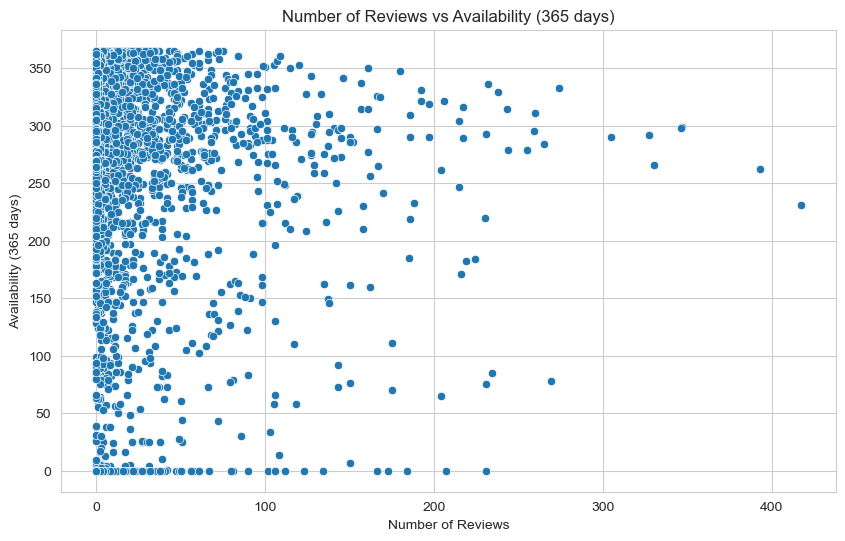

" \nInsight: There appears to be a weak negative correlation between the number of reviews and availability \nthroughout the year. Listings with higher availability tend to have fewer reviews, suggesting that highly \navailable properties may struggle to attract guests or receive lower engagement from guests. \n\n \nRecommendation: Hosts should optimize their listing's availability to strike a balance between occupancy \nrates and guest engagement. They can adjust minimum night stays, offer special deals during low-demand \nperiods, and actively promote their listings to attract more guests and increase review rates.\n"

In [68]:
# Visualize the relationship between 'number_of_reviews' and 'availability_365'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='number_of_reviews', y='availability_365', data=df)
plt.title('Number of Reviews vs Availability (365 days)')
plt.xlabel('Number of Reviews')
plt.ylabel('Availability (365 days)')
plt.savefig('reviews_vs_availability.png')
plt.show()

''' 
Insight: There appears to be a weak negative correlation between the number of reviews and availability 
throughout the year. Listings with higher availability tend to have fewer reviews, suggesting that highly 
available properties may struggle to attract guests or receive lower engagement from guests. 

 
Recommendation: Hosts should optimize their listing's availability to strike a balance between occupancy 
rates and guest engagement. They can adjust minimum night stays, offer special deals during low-demand 
periods, and actively promote their listings to attract more guests and increase review rates.
''' 

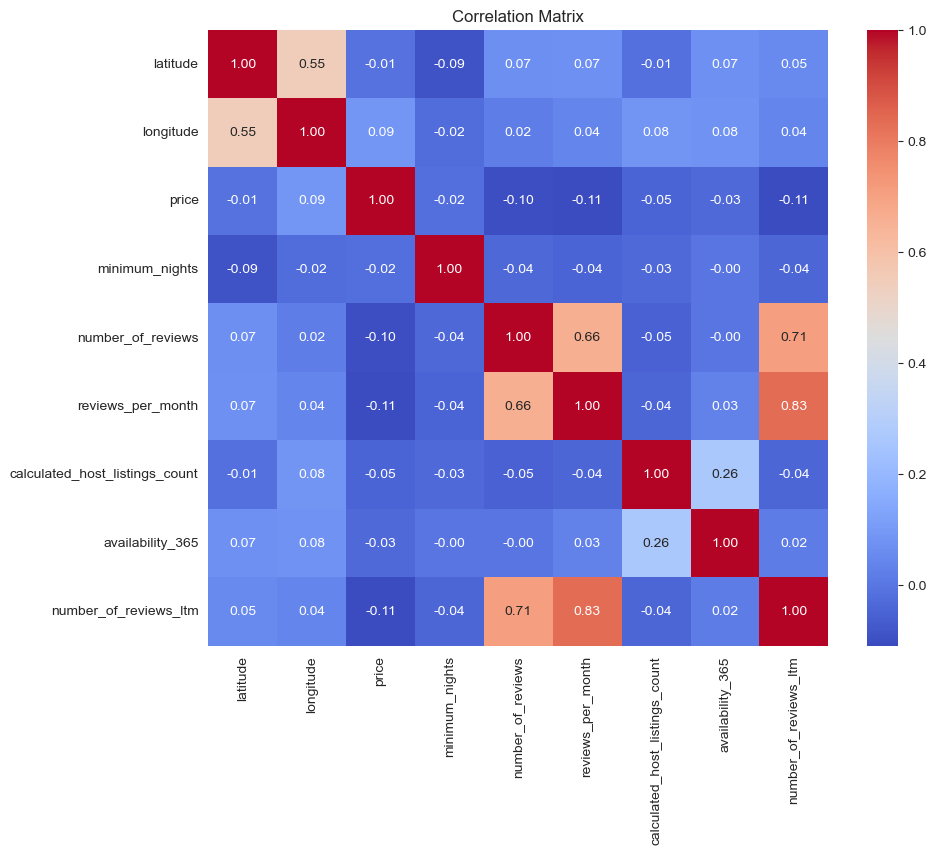

' \nInsight: The correlation matrix provides insights into the relationships between different variables in \nthe dataset. There are weak correlations between most variables, indicating that their relationships are \ncomplex and influenced by various factors.\n \n \nRecommendation: Hosts should conduct further analysis to understand the underlying factors driving these \ncorrelations and tailor their strategies accordingly. They can explore additional variables, such as property \namenities, listing descriptions, and guest demographics, to uncover meaningful insights and improve their \ndecision-making processes.\n'

In [69]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Visualize correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.savefig('correlation_matrix.png')
plt.show()

''' 
Insight: The correlation matrix provides insights into the relationships between different variables in 
the dataset. There are weak correlations between most variables, indicating that their relationships are 
complex and influenced by various factors.
 
 
Recommendation: Hosts should conduct further analysis to understand the underlying factors driving these 
correlations and tailor their strategies accordingly. They can explore additional variables, such as property 
amenities, listing descriptions, and guest demographics, to uncover meaningful insights and improve their 
decision-making processes.
''' 